In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('C:/Users/pavan/Downloads/DSP_SecX_Group_YY/DSP_SecX_Group_YY/data/Auto.csv')  

In [7]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [8]:
# Check data types and basic statistics of the dataset
data_info = df.info()
summary_stats = df.describe()
print(data_info)
print(summary_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    object 
 8   name          397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB
None
              mpg   cylinders  displacement  horsepower       weight  \
count  397.000000  397.000000    397.000000  392.000000   397.000000   
mean    23.515869    5.458438    193.532746  104.469388  2970.261965   
std      7.825804    1.701577    104.379583   38.491160   847.904119   
min      9.000000    3.000000     68.000000   46.000000  1613.00000

In [9]:
# Display the first few rows of the dataset
head = df.head()

# Display the last few rows of the dataset
tail = df.tail()

# Display the number of rows and columns in the dataset
shape = df.shape

# Display unique values in the 'origin' column
unique_values_origin = df['origin'].unique()

print("First few rows:\n", head)
print("\nLast few rows:\n", tail)
print("\nNumber of rows and columns:", shape)
print("\nUnique values in 'origin' column:", unique_values_origin)

First few rows:
     mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

     origin                       name  
0  American  chevrolet chevelle malibu  
1  American          buick skylark 320  
2  American         plymouth satellite  
3  American              amc rebel sst  
4  American                ford torino  

Last few rows:
       mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
392  27.0          4         140.0        86.0    2790          15.6    82   
393  44.0          4          97.0        52.0    2130          24.6    82   
394  32.0          4         

In [11]:
correlation_matrix = df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].corr()
correlation_matrix.head()

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.804443,-0.778427,-0.831739,0.422297
displacement,-0.804443,1.000000,0.897257,0.933104,-0.544162
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196
weight,-0.831739,0.933104,0.864538,1.000000,-0.419502
acceleration,0.422297,-0.544162,-0.689196,-0.419502,1.000000


In [24]:
#By examining the correlation matrix, you can identify which variables are positively or negatively correlated with 'mpg'. 
#A strong negative correlation between 'weight' and 'mpg' suggests that heavier vehicles tend to have lower fuel efficiency.

#'mpg' has a strong negative correlation with 'displacement,' 'horsepower,' and 'weight.' This suggests that as these attributes increase, fuel efficiency (mpg) tends to decrease.
#'mpg' has a positive correlation with 'acceleration,' but the correlation is relatively weak. This indicates that faster acceleration is associated with slightly better fuel efficiency.
#Negative correlations with 'mpg' suggest that cars with lower displacement, lower horsepower, and lower weight tend to have better fuel efficiency, which is an expected and intuitive result.

In [25]:
# Group by 'origin' and calculate the mean 'mpg' for each group
origin_grouped = df.groupby('origin')['mpg'].mean()
print(origin_grouped)
# Group by 'cylinders' and calculate the mean 'mpg' for each group
cylinders_grouped = df.groupby('cylinders')['mpg'].mean()
print("")
print(cylinders_grouped)

origin
American    20.071774
European    27.891429
Japanese    30.450633
Name: mpg, dtype: float64

cylinders
3    20.550000
4    29.317734
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64


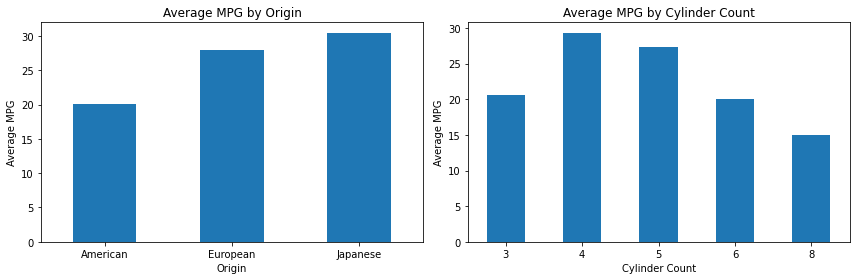

In [26]:
# Create bar charts for 'origin' and 'cylinders' vs. 'mpg'
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
origin_grouped.plot(kind='bar', rot=0)
plt.title('Average MPG by Origin')
plt.xlabel('Origin')
plt.ylabel('Average MPG')

plt.subplot(1, 2, 2)
cylinders_grouped.plot(kind='bar', rot=0)
plt.title('Average MPG by Cylinder Count')
plt.xlabel('Cylinder Count')
plt.ylabel('Average MPG')

plt.tight_layout()
plt.show()

In [27]:
# Group by 'year' and calculate the mean 'mpg' for each year
year_grouped = df.groupby('year')['mpg'].mean()
print(year_grouped)

year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    32.000000
Name: mpg, dtype: float64


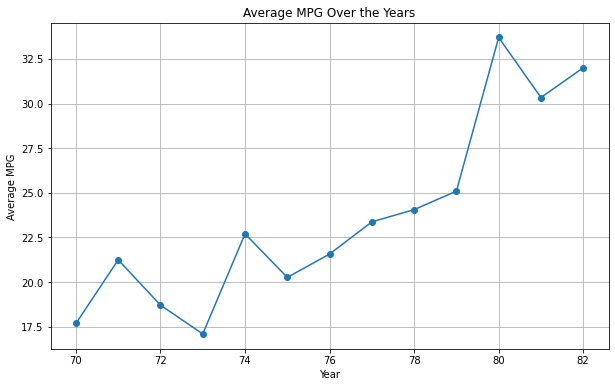

In [28]:
# Create a time series plot for 'mpg' over the years
plt.figure(figsize=(10, 6))
plt.plot(year_grouped.index, year_grouped.values, marker='o', linestyle='-')
plt.title('Average MPG Over the Years')
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.show()

In [29]:
#2. Is there any missing data? How to deal the missing values?

median_horsepower = df['horsepower'].median()
df['horsepower'].fillna(median_horsepower, inplace=True)

In [30]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [31]:
#We are interested in predicting mpg (mile per gallon) based on horsepower
#a. Identify outliers if any and show it in a scatterplot.

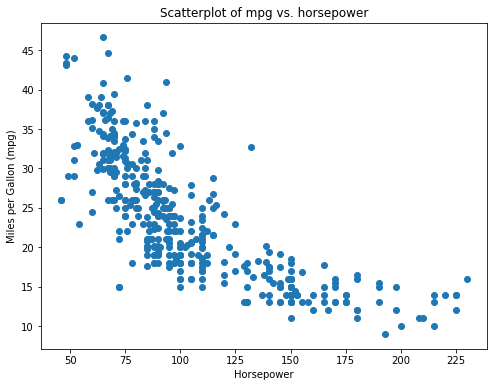

In [32]:
import statsmodels.api as sm

# Create a scatterplot to identify outliers
plt.figure(figsize=(8, 6))
plt.scatter(df['horsepower'], df['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Scatterplot of mpg vs. horsepower')
plt.show()

In [33]:
# Add a constant term to the predictor variable (intercept)
X = sm.add_constant(df['horsepower'])

# Fit a linear regression model
model = sm.OLS(df['mpg'], X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     588.6
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           2.86e-80
Time:                        11:09:08   Log-Likelihood:                -1198.5
No. Observations:                 397   AIC:                             2401.
Df Residuals:                     395   BIC:                             2409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0213      0.725     55.239      0.0

In [56]:
#4.Perform a regression with Weight, origin and horespower as the independent variables.
Interpret the model.
import statsmodels.api as sm

df = pd.read_csv('C:/Users/Santosh/Downloads/DSP_SecX_Group_YY/DSP_SecX_Group_YY/data/Auto.csv')  

missing_values = df.isnull().sum()
print(missing_values)

median_horsepower = df['horsepower'].median()
df['horsepower'].fillna(median_horsepower, inplace=True)

# Convert 'origin' to categorical variables (dummy variables)
df = pd.get_dummies(df, columns=['origin'], drop_first=True)
print(df.columns)

# Define the independent variables (predictors)
X = df[['weight', 'origin_European', 'origin_Japanese', 'horsepower']]

# Add a constant term to the independent variables (intercept)
X = sm.add_constant(X)

# Define the dependent variable (target)
y = df['mpg']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'origin_European', 'origin_Japanese'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     248.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          5.84e-106
Time:                        11:35:23   Log-Likelihood:                -1129.2
No. Observations:                 397   AIC:                             2268.
Df Residuals:                     392   BIC:                             2288.
Df Model:                 

In [57]:
#interpret the model based on the summary output
#Coefficients: The coefficients represent the change in the dependent variable ('mpg') associated with a one-unit change in each respective independent variable while holding all other variables constant.

#The coefficient for 'weight' indicates how a one-unit increase in vehicle weight affects 'mpg.'
#The coefficients for 'origin_2' and 'origin_3' (dummy variables) represent the differences in 'mpg' between cars from origin 2 and origin 3 compared to cars from origin 1.
#The coefficient for 'horsepower' indicates how a one-unit increase in engine horsepower affects 'mpg.'
#intercept (Constant): The intercept represents the predicted 'mpg' when all independent variables are zero. However, this interpretation may not be meaningful, as it assumes a car with zero weight, zero horsepower, and origin 1. Consider the practicality of these values when interpreting the intercept.

#R-squared (R²): The R-squared value measures the proportion of variance in 'mpg' that is explained by the independent variables. A higher R-squared value indicates a better fit of the model to the data.

#p-values: The p-values associated with each coefficient test the null hypothesis that the corresponding coefficient is zero (i.e., no effect). Lower p-values indicate that the predictor is likely to be statistically significant in predicting 'mpg.'

#Confidence Intervals: The confidence intervals provide a range within which the true population values of the coefficients are likely to fall.

#Residuals: Examine the residuals to check if the model assumptions (e.g., linearity, independence, and homoscedasticity) are met.

#Interpretation of Origin: When interpreting the coefficients for 'origin_2' and 'origin_3,' keep in mind that they represent the differences in 'mpg' for cars from origin 2 and origin 3 compared to cars from origin 1. Positive coefficients indicate higher 'mpg' for cars from origin 2 or origin 3 compared to origin 1, while negative coefficients indicate lower 'mpg.'

#Consider the practical implications of the coefficients and whether they align with your domain knowledge and research objectives when interpreting the model.

In [62]:
#5 . Split the data into train and test (70:30). Find the best model which gives lower mse at
#test data (you may have to do trial and error here). Express the model as a mathematical
#equation relating the output variable to the input variables.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('C:/Users/Santosh/Downloads/DSP_SecX_Group_YY/DSP_SecX_Group_YY/data/Auto.csv')  

missing_values = df.isnull().sum()
print(missing_values)

median_horsepower = df['horsepower'].median()
df['horsepower'].fillna(median_horsepower, inplace=True)

# Convert 'origin' to categorical variables (dummy variables)
df = pd.get_dummies(df, columns=['origin'], drop_first=True)
print(df.columns)

# Define the independent variables (predictors) and the dependent variable
X = df[['weight', 'origin_European', 'origin_Japanese', 'horsepower']]
y = df['mpg']

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize variables to keep track of the best model and its MSE
best_model = None
best_mse = float('inf')

# Iterate through models with different feature combinations
for features in [
    ['weight', 'origin_European', 'origin_Japanese', 'horsepower'],
    ['weight', 'origin_European', 'origin_Japanese'],
    ['weight', 'origin_European'],
    ['weight'],
]:
    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train[features], y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test[features])
    
    # Calculate MSE for the current model
    mse = mean_squared_error(y_test, y_pred)
    
    # Check if the current model has a lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
        best_features = features

# Print the best model and its features
print("Best Features:", best_features)
print("Best MSE on Test Data:", best_mse)

# Express the best model mathematically
coef = best_model.coef_
intercept = best_model.intercept_
model_equation = f"mpg = {intercept:.2f} + "
for i, feature in enumerate(best_features):
    model_equation += f"{coef[i]:.2f}*{feature} + "
model_equation = model_equation[:-2]  # Remove the trailing "+ "
print("Best Model Equation:", model_equation)


mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'origin_European', 'origin_Japanese'],
      dtype='object')
Best Features: ['weight', 'origin_European', 'origin_Japanese', 'horsepower']
Best MSE on Test Data: 20.828422036997306
Best Model Equation: mpg = 44.38 + -0.01*weight + 1.07*origin_European + 1.50*origin_Japanese + -0.05*horsepower 


In [63]:
#Improving above by using Use Cross-Validation, Automate Feature Selection,Use Grid Search for Hyperparameter Tuning

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error


df = pd.read_csv('C:/Users/Santosh/Downloads/DSP_SecX_Group_YY/DSP_SecX_Group_YY/data/Auto.csv')  

missing_values = df.isnull().sum()
print(missing_values)

median_horsepower = df['horsepower'].median()
df['horsepower'].fillna(median_horsepower, inplace=True)

# Convert 'origin' to categorical variables (dummy variables)
df = pd.get_dummies(df, columns=['origin'], drop_first=True)
print(df.columns)

# Define the independent variables (predictors) and the dependent variable
X = df[['weight', 'origin_European', 'origin_Japanese', 'horsepower']]
y = df['mpg']

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a linear regression model
model = LinearRegression()

# Initialize RFECV for automated feature selection
rfecv = RFECV(estimator=model, cv=5, scoring='neg_mean_squared_error')

# Fit RFECV on the training data
rfecv.fit(X_train, y_train)

# Get the best features selected by RFECV
best_features = X.columns[rfecv.support_].tolist()

# Fit the model on the best selected features
model.fit(X_train[best_features], y_train)

# Predict on the test data
y_pred = model.predict(X_test[best_features])

# Calculate MSE on the test data
mse = mean_squared_error(y_test, y_pred)

# Print the best features and MSE
print("Best Features:", best_features)
print("MSE on Test Data:", mse)

# Express the model mathematically
coef = model.coef_
intercept = model.intercept_
model_equation = f"mpg = {intercept:.2f} + "
for i, feature in enumerate(best_features):
    model_equation += f"{coef[i]:.2f}*{feature} + "
model_equation = model_equation[:-2]  # Remove the trailing "+ "
print("Best Model Equation:", model_equation)

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'origin_European', 'origin_Japanese'],
      dtype='object')
Best Features: ['weight', 'origin_European', 'origin_Japanese', 'horsepower']
MSE on Test Data: 20.828422036997306
Best Model Equation: mpg = 44.38 + -0.01*weight + 1.07*origin_European + 1.50*origin_Japanese + -0.05*horsepower 


In [65]:
#Conclusion and findings